In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score  
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import auc



In [ ]:
rela_embedding = pd.read_csv('/content/drive/MyDrive/Xiyuan Chang Drexel senior design/term 3/avila/data/KRAL_Embedding_Model_AVILA_D016-rela.csv')
tail_embedding=pd.read_csv('/content/drive/MyDrive/Xiyuan Chang Drexel senior design/term 3/avila/data/KRAL_Embedding_Model_AVILA_D016-tail.csv')
rela_embedding

,relation,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,F1,-0.051674,-0.243151,0.176932,-0.096760,1.187138,0.215261,0.089789,-0.374852,0.313713,-0.013659,-0.027618,0.281978,-0.556659,0.157912,0.264299,-0.146042
1,F2,0.944991,-0.305664,0.212374,0.103421,0.275527,0.189101,0.094045,-0.376822,0.311811,-0.013609,-0.027622,0.280361,-0.557014,0.157848,0.264189,-0.146752
2,F3,-0.052048,0.527110,0.212101,0.104171,0.275413,0.794660,0.092820,-0.378496,0.311329,-0.013657,-0.027951,0.280414,-0.556863,0.157904,0.264177,-0.147217
3,F4,-0.047540,-0.242944,0.211392,0.102966,0.275456,0.205079,-0.002895,0.009567,-0.248831,-0.013327,0.141041,0.290788,-0.557613,0.155927,0.264102,-0.147168
4,F5,-0.023874,-0.239452,0.219793,0.093680,0.274988,0.188850,0.094762,-0.377254,0.310948,-0.066487,0.061371,0.280453,-1.362505,0.157945,0.264217,-0.035884
5,F6,-0.051885,-0.243237,0.382846,-0.870666,0.274539,0.189188,0.104155,-0.377281,0.311660,-0.013556,-0.028148,0.280599,-0.557366,0.157977,0.264355,-0.147201
6,F7,-0.061289,-0.243277,0.211618,0.102806,1.254853,0.017775,0.094979,-0.376462,0.312600,-0.014019,-0.027420,0.280759,-0.556737,0.158005,0.264409,-0.147012
7,F8,-0.051712,-0.229985,0.430822,0.103519,1.078669,0.188793,-0.102445,-0.375718,0.311062,-0.013777,-0.027623,0.280392,-0.557250,0.157736,0.263835,-0.147424
8,F9,-0.051688,-0.323105,-0.757391,0.103255,0.201352,0.188917,0.094027,-0.376704,0.312032,-0.013665,-0.028391,0.280584,-0.557602,0.157924,0.264287,-0.147130
9,F0,-0.051894,-0.245232,0.220727,0.348005,-0.562660,0.189416,0.224888,-0.377960,0.314958,-0.013514,-0.027322,0.280337,-0.556911,0.157783,0.264163,-0.146865


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
x_test = pd.read_csv("/content/drive/MyDrive/Xiyuan Chang Drexel senior design/term 3/avila/data/avila-ts.csv").drop(['PA'],axis=1)
avila_train_val=pd.read_csv("/content/drive/MyDrive/Xiyuan Chang Drexel senior design/term 3/avila/data/avila-tr.csv").drop(['PA'],axis=1)
y_train_val=avila_train_val['LABEL']
y_test=x_test['LABEL']
x_test=x_test.drop(['LABEL'],axis=1)
avila_train_val=avila_train_val.drop(['LABEL'],axis=1)
avila_train_val


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F0
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652
...,...,...,...,...,...,...,...,...,...,...
10425,0.080916,0.588093,0.015130,0.002250,0.261718,-0.557133,0.371178,0.932346,0.282354,-0.580141
10426,0.253730,-0.338346,0.352988,-1.154243,0.172340,-0.557133,0.257927,0.348428,0.032902,-0.527134
10427,0.229043,-0.000745,0.171611,-0.002793,0.261718,0.688613,0.295677,-1.088486,-0.590727,0.580142
10428,-0.301743,0.352558,0.288973,1.638181,0.261718,0.688613,0.069175,0.502761,0.625350,0.718969


In [4]:
print(avila_train_val.isin([' ']).any().any())
print(x_test.isin([' ']).any().any())
print(avila_train_val.isnull().any().any())
print(x_test.isnull().any().any())
print(y_test.isnull().any().any())
print(y_train_val.isnull().any().any())


False
False
False
False
False
False


In [ ]:
print(rela_embedding.relation.unique())
print(x_test.columns)
print(avila_train_val.columns)

['F1' 'F2' 'F3' 'F4' 'F5' 'F6' 'F7' 'F8' 'F9' 'F0']
Index(['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F0'], dtype='object')
Index(['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F0'], dtype='object')


In [ ]:

# define a function to construct the desired string
def format_value(col, val):
    if pd.isna(val):
        return val
    else:
        return col + ':' + str(val)

x_test_mapping=x_test.copy()
x_test_dct = x_test_mapping.to_dict(orient='list')



x_test_mapping_dct = {}
for col in x_test_dct:
    x_test_mapping_dct[col] = [format_value(col, val) for val in x_test_dct[col]]

print(x_test_mapping_dct)


{'F1': ['F1:-3.498799', 'F1:0.204355', 'F1:0.759828', 'F1:-0.00549', 'F1:0.080916', 'F1:0.068573', 'F1:-0.301743', 'F1:0.031541', 'F1:-0.091897', 'F1:0.377169', 'F1:-0.202992', 'F1:0.019197', 'F1:0.266074', 'F1:0.204355', 'F1:-0.141273', 'F1:-0.511588', 'F1:-0.042522', 'F1:-0.32643', 'F1:0.759828', 'F1:0.698109', 'F1:0.216699', 'F1:0.278418', 'F1:0.117948', 'F1:0.587014', 'F1:-0.128929', 'F1:0.15498', 'F1:0.019197', 'F1:0.031541', 'F1:0.080916', 'F1:0.216699', 'F1:-0.264711', 'F1:0.599358', 'F1:-0.314087', 'F1:0.130292', 'F1:0.31545', 'F1:-0.277055', 'F1:-0.190648', 'F1:0.216699', 'F1:0.4142', 'F1:0.944986', 'F1:0.09326', 'F1:-0.030178', 'F1:-0.32643', 'F1:-3.498799', 'F1:0.056229', 'F1:-0.301743', 'F1:0.204355', 'F1:0.31545', 'F1:-0.042522', 'F1:0.09326', 'F1:-3.498799', 'F1:0.401857', 'F1:0.216699', 'F1:1.019049', 'F1:-0.054866', 'F1:0.994361', 'F1:-0.030178', 'F1:0.192011', 'F1:0.019197', 'F1:-0.00549', 'F1:-0.030178', 'F1:-0.22768', 'F1:-0.301743', 'F1:-0.351118', 'F1:0.15498', 'F1

In [ ]:
x_test_mapping_df=pd.DataFrame(x_test_mapping_dct)
x_test_mapping_df

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F0
0,F1:-3.498799,F2:0.250492,F3:0.23207,F4:1.224178,F5:-4.922215,F6:1.145386,F7:0.182426,F8:-0.165983,F9:-0.123005,F0:1.087144
1,F1:0.204355,F2:-0.354049,F3:0.32098,F4:0.410166,F5:-0.989576,F6:-2.218127,F7:0.220177,F8:0.181844,F9:2.090879,F0:-2.009758
2,F1:0.759828,F2:-1.304042,F3:-0.023991,F4:-0.973663,F5:-0.006417,F6:-0.349509,F7:-0.42158,F8:-0.450127,F9:0.469443,F0:0.060952
3,F1:-0.00549,F2:0.360409,F3:0.28186,F4:-0.213479,F5:-1.168333,F6:-1.013906,F7:-0.34608,F8:1.176165,F9:0.968347,F0:-0.627999
4,F1:0.080916,F2:0.10132,F3:0.10404,F4:0.14049,F5:0.261718,F6:0.480988,F7:0.710932,F8:-0.25343,F9:-0.497183,F0:0.155681
...,...,...,...,...,...,...,...,...,...,...
10432,F1:-0.128929,F2:-0.040001,F3:0.057807,F4:0.557894,F5:0.261718,F6:-0.930856,F7:-0.044076,F8:1.158458,F9:2.277968,F0:-0.699884
10433,F1:0.266074,F2:0.556689,F3:-0.020434,F4:0.176624,F5:0.261718,F6:-0.515608,F7:0.597681,F8:0.178349,F9:0.62535,F0:-0.657245
10434,F1:-0.054866,F2:0.580242,F3:0.032912,F4:-0.016668,F5:0.261718,F6:1.519109,F7:0.371178,F8:-0.985508,F9:-0.403638,F0:1.276301
10435,F1:0.080916,F2:0.588093,F3:0.01513,F4:0.00225,F5:0.261718,F6:-0.930856,F7:-0.270579,F8:0.163807,F9:-0.091823,F0:-0.593329


In [ ]:
x_test_mapping_df.to_csv('/content/drive/MyDrive/Xiyuan Chang Drexel senior design/term 3/avila/data/x_test_map_tail.csv')

In [ ]:

# define a function to construct the desired string
def format_value(col, val):
    if pd.isna(val):
        return val
    else:
        return col + ':' + str(val)

x_trainval_mapping=avila_train_val.copy()

x_trainval_dct = x_trainval_mapping.to_dict(orient='list')



x_trainval_mapping_dct = {}
for col in x_trainval_dct:
    x_trainval_mapping_dct[col] = [format_value(col, val) for val in x_trainval_dct[col]]

x_trainval_mapping_df=pd.DataFrame(x_trainval_mapping_dct)
x_trainval_mapping_df.to_csv('/content/drive/MyDrive/Xiyuan Chang Drexel senior design/term 3/avila/data/x_trainval_mapping_df.csv')


In [ ]:
test_notnull=[]
for i in range(len(x_test_mapping_df)):
    total_test_reltal=[]
    for j in x_test_mapping_df.columns:
        rela=rela_embedding[rela_embedding.relation==j].drop(['relation'],axis=1).values.tolist()[0]
        tailv=tail_embedding[tail_embedding['tail']==x_test_mapping_df.loc[i,j]].drop(['tail'],axis=1).values.tolist()
        if tailv:
            total_test_reltal.append((rela+tailv[0]))
    test_notnull.append(total_test_reltal)
      

test_notnull_len=[]
for i in range(len(test_notnull)):
    test_notnull_len.append(len(test_notnull[i]))

print(len(test_notnull))

print(len(test_notnull[0]))
print(len(test_notnull[0][0]))


10437
10
32


In [ ]:
import pickle
filename = '/content/drive/MyDrive/Xiyuan Chang Drexel senior design/term 3/avila/data/avila_test_notnull.pickle'

# open the file for writing in binary mode
with open(filename, 'wb') as f:
    # serialize the list and write it to the file
    pickle.dump(test_notnull, f)

In [ ]:
train_val_notnulllst=[]
for i in range(len(x_trainval_mapping_df)):
    total_trainval_reltal=[]
    for j in x_trainval_mapping_df.columns:
        rela=rela_embedding[rela_embedding.relation==j].drop(['relation'],axis=1).values.tolist()[0]
        tailv=tail_embedding[tail_embedding['tail']==x_trainval_mapping_df.loc[i,j]].drop(['tail'],axis=1).values.tolist()
        if tailv:
            total_trainval_reltal.append((rela+tailv[0]))
    train_val_notnulllst.append(total_trainval_reltal)
      
trainval_notnull_len=[]
for i in range(len(train_val_notnulllst)):
    trainval_notnull_len.append(len(train_val_notnulllst[i]))

print(len(train_val_notnulllst))

print(len(train_val_notnulllst[1]))
print(len(train_val_notnulllst[1][0]))


10430
10
32


In [ ]:
with open('/content/drive/MyDrive/Xiyuan Chang Drexel senior design/term 3/avila/data/avila_train_val_notnull.pickle', 'wb') as f:
    # serialize the list and write it to the file
    pickle.dump(train_val_notnulllst, f)

In [ ]:
y_train_val.to_csv('/content/drive/MyDrive/Xiyuan Chang Drexel senior design/term 3/avila/data/y_avila_trainval.csv')
y_test.to_csv('/content/drive/MyDrive/Xiyuan Chang Drexel senior design/term 3/avila/data/y_test_avila.csv')
avila_train_val.to_csv('/content/drive/MyDrive/Xiyuan Chang Drexel senior design/term 3/avila/data/avila_train_val.csv')
x_test.to_csv('/content/drive/MyDrive/Xiyuan Chang Drexel senior design/term 3/avila/data/avila_x_test.csv')

**LR**

In [5]:
y_test=pd.read_csv('/content/drive/MyDrive/Xiyuan Chang Drexel senior design/term 3/avila/data/y_test_avila.csv').drop(['Unnamed: 0'],axis=1)
y_test

,LABEL
0,W
1,A
2,I
3,E
4,A
...,...
10432,X
10433,G
10434,A
10435,F


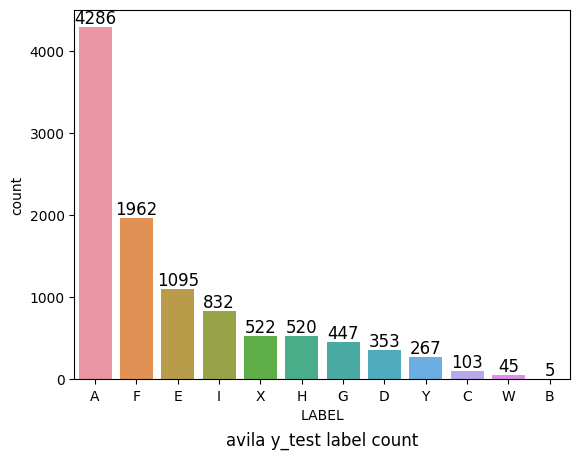

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test is your data
test_data_counts = y_test['LABEL'].value_counts().sort_values(ascending=False).index

sns.countplot(x=y_test['LABEL'], order=test_data_counts)

# Adding the text labels for each bar
ax = plt.gca()  # Get the current Axes instance on the current figure
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

# Adding title
plt.title("avila y_test label count",y=-0.2)
plt.savefig('/content/drive/MyDrive/Xiyuan Chang Drexel senior design/term 3/avila/data/avila y_test label count.jpg')
plt.show()


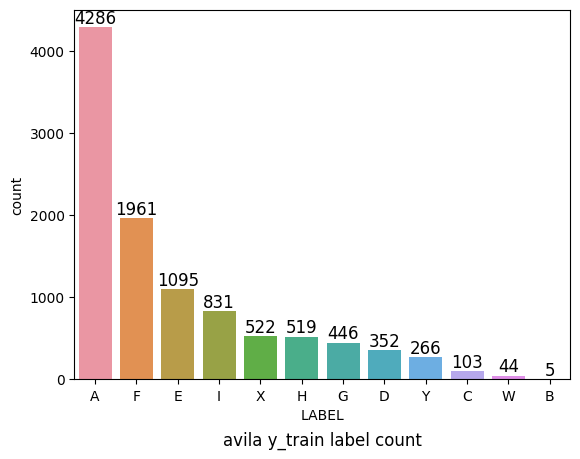

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test is your data
trainval_data_counts = y_train_val.value_counts().sort_values(ascending=False).index

sns.countplot(x=y_train_val, order=trainval_data_counts)

# Adding the text labels for each bar
ax = plt.gca()  # Get the current Axes instance on the current figure
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

# Adding title
plt.title("avila y_train label count",y=-0.2)
plt.savefig('/content/drive/MyDrive/Xiyuan Chang Drexel senior design/term 3/avila/data/avila y_trainval label count.jpg')
plt.show()


In [ ]:
import random
from sklearn.model_selection import train_test_split
train_val_data=avila_train_val 
train_val_label=y_train_val.values.tolist()

train_data, val_data, train_y, val_y =  train_test_split(train_val_data,train_val_label,test_size=0.3, stratify=train_val_label, random_state=0)

print(len(train_val_label))
print(len(train_data))
print(len(val_data))


10430
7301
3129


In [ ]:
train_data.to_csv('/content/drive/MyDrive/Xiyuan Chang Drexel senior design/term 3/avila/data/tabel_train_data.csv',index=0)
val_data.to_csv('/content/drive/MyDrive/Xiyuan Chang Drexel senior design/term 3/avila/data/tabel_val_data.csv',index=0)
pd.DataFrame(train_y).to_csv('/content/drive/MyDrive/Xiyuan Chang Drexel senior design/term 3/avila/data/tabel_train_y.csv',index=0)
pd.DataFrame(val_y).to_csv('/content/drive/MyDrive/Xiyuan Chang Drexel senior design/term 3/avila/data/tabel_val_y.csv',index=0)


In [ ]:

# define a function to construct the desired string
def format_value(col, val):
    if pd.isna(val):
        return val
    else:
        return col + ':' + str(val)

x_train_mapping=train_data.copy()

x_train_dct = x_train_mapping.to_dict(orient='list')



x_train_mapping_dct = {}
for col in x_train_dct:
    x_train_mapping_dct[col] = [format_value(col, val) for val in x_train_dct[col]]

x_train_mapping_df=pd.DataFrame(x_train_mapping_dct)
x_train_mapping_df.to_csv('/content/drive/MyDrive/Xiyuan Chang Drexel senior design/term 3/avila/data/x_train_mapping_df.csv')


In [ ]:
train_notnulllst=[]
for i in range(len(x_train_mapping_df)):
    total_train_reltal=[]
    for j in x_train_mapping_df.columns:
        rela=rela_embedding[rela_embedding.relation==j].drop(['relation'],axis=1).values.tolist()[0]
        tailv=tail_embedding[tail_embedding['tail']==x_train_mapping_df.loc[i,j]].drop(['tail'],axis=1).values.tolist()
        if tailv:
            total_train_reltal.append((rela+tailv[0]))
    train_notnulllst.append(total_train_reltal)
      
train_notnull_len=[]
for i in range(len(train_notnulllst)):
    train_notnull_len.append(len(train_notnulllst[i]))

print(len(train_notnulllst))

print(len(train_notnulllst[1]))
print(len(train_notnulllst[1][0]))


7301
10
32


In [ ]:
with open('/content/drive/MyDrive/Xiyuan Chang Drexel senior design/term 3/avila/data/avila_train_notnull.pickle', 'wb') as f:
    # serialize the list and write it to the file
    pickle.dump(train_notnulllst, f)

In [ ]:

# define a function to construct the desired string
def format_value(col, val):
    if pd.isna(val):
        return val
    else:
        return col + ':' + str(val)

x_val_mapping=val_data.copy()

x_val_dct = x_val_mapping.to_dict(orient='list')



x_val_mapping_dct = {}
for col in x_val_dct:
    x_val_mapping_dct[col] = [format_value(col, val) for val in x_val_dct[col]]

x_val_mapping_df=pd.DataFrame(x_val_mapping_dct)
x_val_mapping_df.to_csv('/content/drive/MyDrive/Xiyuan Chang Drexel senior design/term 3/avila/data/x_val_mapping_df.csv')


In [ ]:
val_notnulllst=[]
for i in range(len(x_val_mapping_df)):
    total_val_reltal=[]
    for j in x_val_mapping_df.columns:
        rela=rela_embedding[rela_embedding.relation==j].drop(['relation'],axis=1).values.tolist()[0]
        tailv=tail_embedding[tail_embedding['tail']==x_train_mapping_df.loc[i,j]].drop(['tail'],axis=1).values.tolist()
        if tailv:
            total_val_reltal.append((rela+tailv[0]))
    val_notnulllst.append(total_val_reltal)
      
val_notnull_len=[]
for i in range(len(val_notnulllst)):
    val_notnull_len.append(len(val_notnulllst[i]))

print(len(val_notnulllst))

print(len(val_notnulllst[1]))
print(len(val_notnulllst[1][0]))

with open('/content/drive/MyDrive/Xiyuan Chang Drexel senior design/term 3/avila/data/avila_val_notnull.pickle', 'wb') as f:
    # serialize the list and write it to the file
    pickle.dump(val_notnulllst, f)


3129
10
32


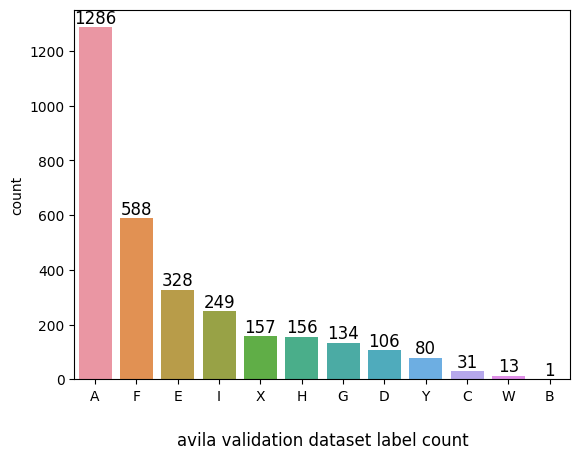

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

data_counts = pd.Series(val_y).value_counts().sort_values(ascending=False).index

sns.countplot(x=pd.Series(val_y), order=data_counts)



# Adding the text labels for each bar
ax = plt.gca()  # Get the current Axes instance on the current figure
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

# Adding title
plt.title("avila validation dataset label count",y=-0.2)
plt.savefig('/content/drive/MyDrive/Xiyuan Chang Drexel senior design/term 3/avila/data/avila val_y label count.jpg')
plt.show()


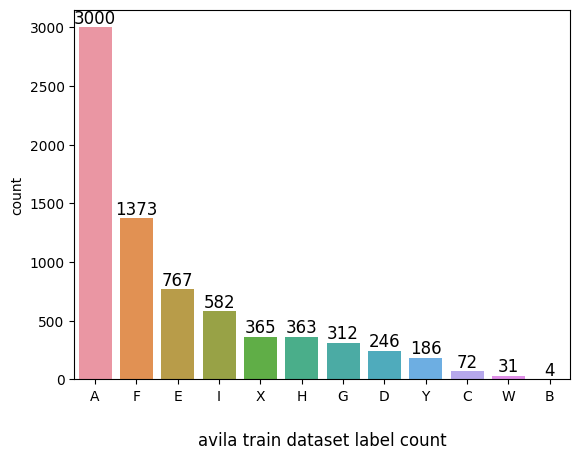

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test is your data
train_data_counts = pd.Series(train_y).value_counts().sort_values(ascending=False).index

sns.countplot(x=pd.Series(train_y), order=train_data_counts)
# Adding the text labels for each bar
ax = plt.gca()  # Get the current Axes instance on the current figure
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

# Adding title
plt.title("avila train dataset label count",y=-0.2)
plt.savefig('/content/drive/MyDrive/Xiyuan Chang Drexel senior design/term 3/avila/data/avila train_y label count.jpg')
plt.show()


LR多分类：
https://machinelearningmastery.com/multinomial-logistic-regression-with-python/

In [ ]:
train_data=pd.read_csv('/content/drive/MyDrive/Xiyuan Chang Drexel senior design/term 3/avila/data/tabel_train_data.csv')
val_data=pd.read_csv('/content/drive/MyDrive/Xiyuan Chang Drexel senior design/term 3/avila/data/tabel_val_data.csv')
train_y=pd.read_csv('/content/drive/MyDrive/Xiyuan Chang Drexel senior design/term 3/avila/data/tabel_train_y.csv')
val_y=pd.read_csv('/content/drive/MyDrive/Xiyuan Chang Drexel senior design/term 3/avila/data/tabel_val_y.csv')
val_y

,0
0,A
1,A
2,G
3,D
4,A
...,...
3124,A
3125,A
3126,D
3127,X


In [ ]:
model_1 = LogisticRegression(multi_class='multinomial',solver='lbfgs', penalty='l2', C=1.0,class_weight='balanced', max_iter=12000).fit(train_data, train_y.values.ravel())
y_pred = model_1.predict(x_test)

# Print the classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.73      0.32      0.44      4286
           B       1.00      1.00      1.00         5
           C       0.08      0.40      0.13       103
           D       0.16      0.32      0.21       353
           E       0.47      0.35      0.40      1095
           F       0.39      0.34      0.37      1962
           G       0.13      0.36      0.20       447
           H       0.28      0.56      0.37       520
           I       0.82      0.83      0.83       832
           W       0.06      0.98      0.12        45
           X       0.55      0.69      0.61       522
           Y       0.50      0.73      0.59       267

    accuracy                           0.41     10437
   macro avg       0.43      0.57      0.44     10437
weighted avg       0.55      0.41      0.44     10437

[[1352    0  224  296  165  890  595  228   57  352  102   25]
 [   0    5    0    0    0    0    0    0    0    0    0    0]
 [   0 

calculate f-score for per class

In [ ]:
# Get classification report
report = classification_report(y_test, y_pred,output_dict=True)

# Print F1-score for each label
for label, metrics in report.items():
    if label.isdigit():  # check if the label is a digit (class label) and not 'accuracy', 'macro avg', etc.
        print(f'F1-score for label {label}: {metrics["f1-score"]}')

# If you want to print the average F1-score
print(f'Average F1-score: {report["macro avg"]["f1-score"]}')

Average F1-score: 0.439008552906153


xgb.DMatrix

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame and 'class' is the column with classes
le = LabelEncoder()
y_test_labels=y_test.values.ravel().copy()
y_test_labels = le.fit_transform(y_test_labels)
y_train_labels=train_y.values.ravel().copy()
y_train_labels = le.fit_transform(y_train_labels)
y_train_labels

array([10,  0,  5, ...,  3,  5,  4])

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

param = {
    'objective': 'multi:softmax',  # Specify multiclass classification
    'num_class': 12,  # Number of possible output classes
    'n_estimators': 100,  # Number of trees to build
    'learning_rate': 0.1,  # Learning rate
}

# Convert input data to DMatrix format
dtrain = xgb.DMatrix(train_data,  label=y_train_labels)
dtest = xgb.DMatrix(x_test)

# Train the model
model = xgb.train(param, dtrain)

# Make predictions
preds = model.predict(dtest)

# Evaluate predictions
accuracy = accuracy_score(y_test_labels, preds)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print(classification_report(y_test_labels, preds))


[19:17:09] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

Accuracy: 85.19%
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      4286
           1       1.00      1.00      1.00         5
           2       0.96      0.88      0.92       103
           3       0.80      0.87      0.83       353
           4       0.87      0.91      0.89      1095
           5       0.84      0.54      0.66      1962
           6       0.93      0.92      0.93       447
           7       0.87      0.83      0.85       520
           8       1.00      0.97      0.98       832
           9       0.87      1.00      0.93        45
          10       0.98      0.94      0.96       522
          11       0.97      0.95      0.96       267

    accuracy                           0.85     10437
   macro avg       0.91      0.89      0.90     10437
weighted avg       0.86      0.85      0.85     10437

